<a href="https://colab.research.google.com/github/DanielCRC/Daniel-AI-lab/blob/main/Assignment_1_Chaves_Daniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data preparation**

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

# df = pd.read_csv('Exercise2BusData.csv')
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


In [ ]:
df.shape

(2179, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB


<Axes: xlabel='Arrival_delay', ylabel='Count'>

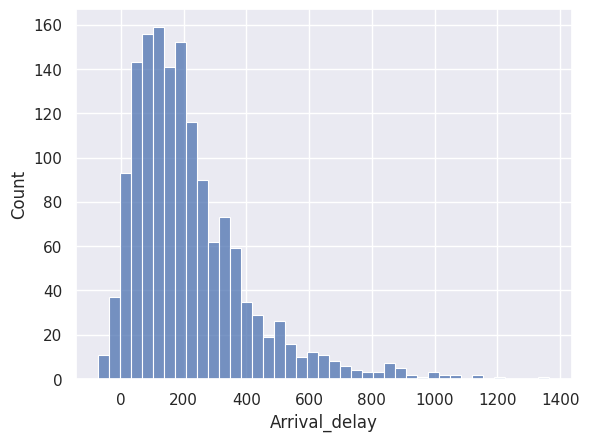

In [ ]:
df = df.iloc[:1500] #changed the amount of records
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['Arrival_delay'])

In [ ]:
df.head()

,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,-23,0,39,-4,28.641509
1,168,0,39,181,27.880597
2,231,0,39,244,27.852941
3,150,17,39,143,27.826087
4,965,35,51,947,42.029412


In [ ]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

Arrival_delay            1.000000
Upstream_stop_delay      0.994093
Dwell_time               0.205955
Recurrent_delay          0.169555
Scheduled_travel_time    0.121293
Name: Arrival_delay, dtype: float64

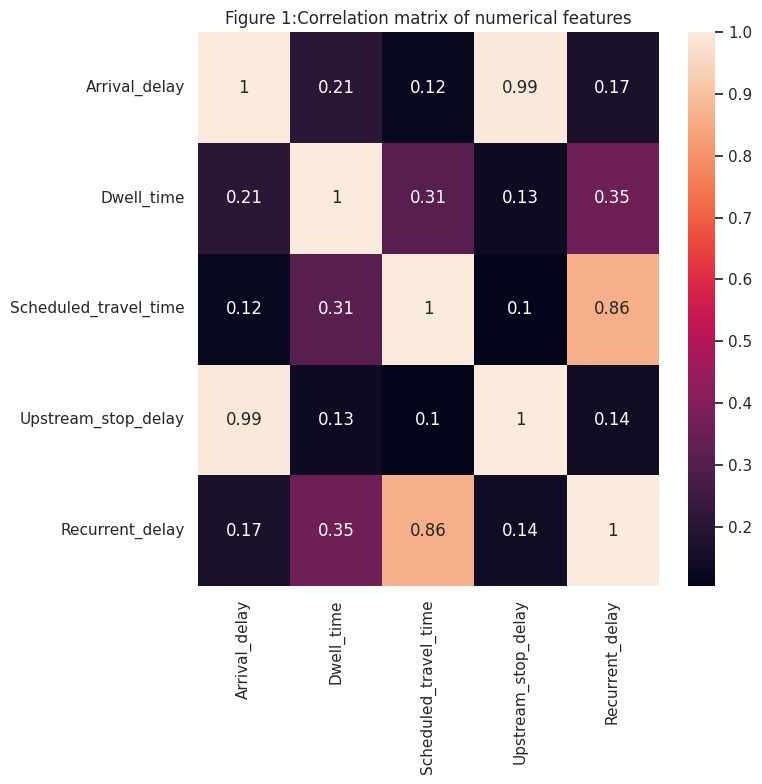

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(8,8))

corr = df.corr()
sns.heatmap(corr, annot = True)

plt.title("Figure 1:Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

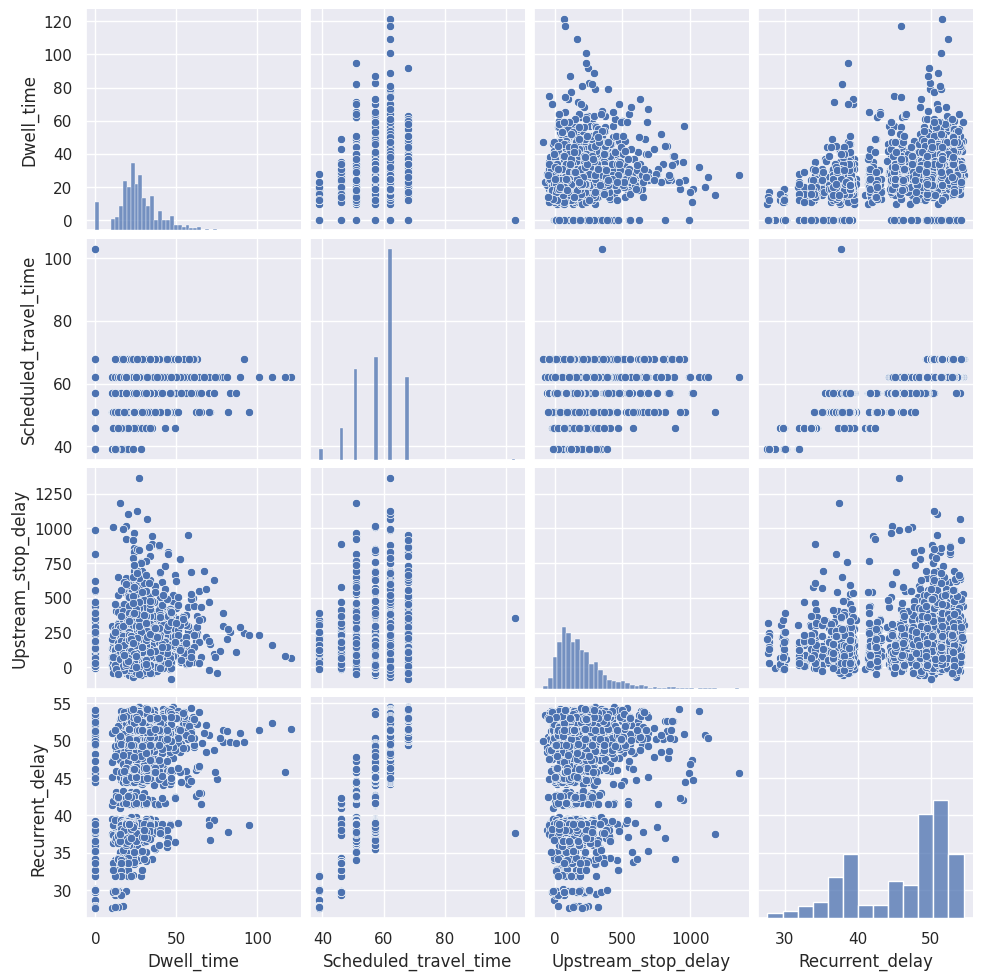

In [ ]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

sns.pairplot(x)

**Training and prediction**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #20% of data for testing #random_state is just a number you set to make sure you have the same splitted sets.

**Linear regression model**

In [ ]:
# Perform a linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Load the model
lr = LinearRegression(fit_intercept = True)
# Train the model
model = lr.fit(X_train,y_train)
# Make prediction on test set
y_pred = model.predict(X_test)

cross_val_score(model, x, y, cv=5).mean()

0.993666520375674

**Model evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.804151660465825
Mean Squared Error: 196.6764824685972
R-squared: 0.9929030844172968


**Visualizing results**

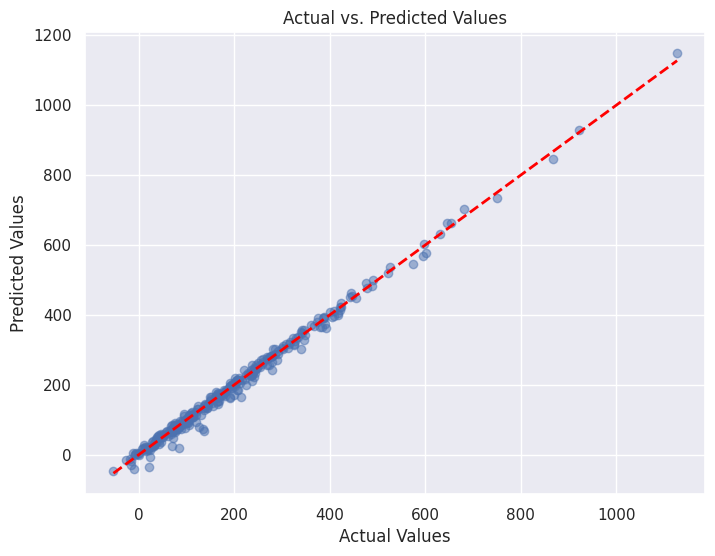

In [ ]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

In [ ]:
#The intercept
print('The intercept is: ',model.intercept_)
#The slope coefficient
print('The slope coefficient is: ', model.coef_)

# Compute MSE, RMSE, MAE and R2
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np


print ('Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print ('Root Mean Square Error (RMSE): ', np.sqrt( mean_squared_error(y_test,y_pred)))
print ('Mean Absolute Error(MAE): ',mean_absolute_error(y_test,y_pred))
print('R Square: ', r2_score(y_test,y_pred))

r2s= r2_score(y_test,y_pred)

adjusted_r_squared1 = 1 - (1-r2s)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1) #-1 because we are including an intercept otherwise there is no -1
print('Adjusted R Square is: ',adjusted_r_squared1)

The intercept is:  -3.1280301785382107
The slope coefficient is:  [ 0.97528287 -0.65926935  1.00414093  0.65993317]
Mean Squared Error (MSE):  196.6764824685972
Root Mean Square Error (RMSE):  14.024139277281767
Mean Absolute Error(MAE):  9.804151660465825
R Square:  0.9929030844172968
Adjusted R Square is:  0.9928068550534636


In [ ]:
def get_table(X,Y):
    lm = LinearRegression(fit_intercept = True)
    lm.fit(X,Y)

    params = np.append(lm.intercept_,lm.coef_)
    newX = np.append(np.ones((len(X),1)), X, axis=1)

    predictions = lm.predict(X)
    MSE = (np.sum((Y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["p-value"] = [params,sd_b,ts_b,p_values]
    print(myDF3)



In [ ]:
import scipy.stats as stats
get_table(x.values,y.values)

   Coefficients  Standard Errors  t values  p-value
0       -3.8522            3.274    -1.177     0.24
1        0.9782            0.029    34.159     0.00
2       -0.6500            0.109    -5.975     0.00
3        1.0024            0.002   479.645     0.00
4        0.6755            0.116     5.831     0.00


# Bus delay prediction

**Model training technics**

In [ ]:
from sklearn.preprocessing import RobustScaler

# Normalize the features
scaler = RobustScaler() #removes the median and scales the data according to the quantile range
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.0

In [ ]:
# Create an SVR model with the best parameters from the grid search
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])

# Perform cross-validation on the entire dataset
cv_scores = cross_val_score(best_svr, x , y, cv=5, verbose=2).mean()
print(cv_scores)

[CV] END .................................................... total time=  25.9s
[CV] END .................................................... total time=  20.6s
[CV] END .................................................... total time=  19.4s
[CV] END .................................................... total time=  47.2s
[CV] END .................................................... total time=  14.0s
0.9935940920817192


In [ ]:
best_svr.fit(X_train, y_train)

SVR(C=10, epsilon=10, kernel='linear')

PREDICTION

In [ ]:
y_pred = best_svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.960435596286512
Mean Squared Error: 205.35678956231718
R-squared: 0.992589862389412


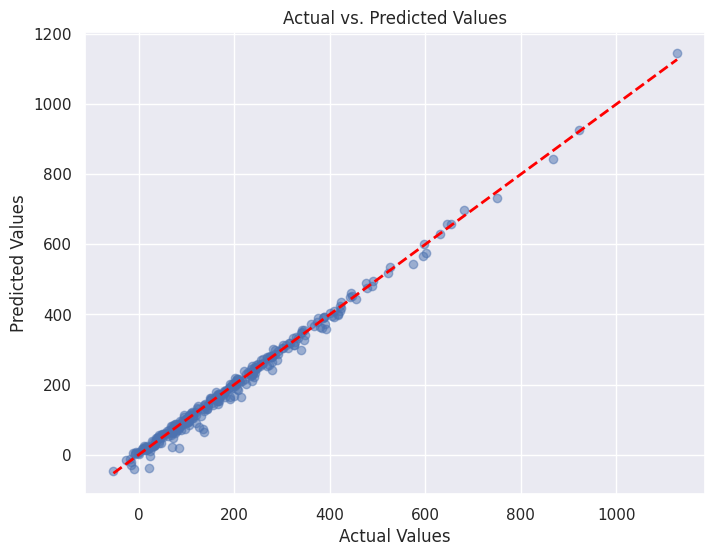

In [ ]:
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

In [ ]:
df.shape

(1500, 5)

## Using xGBoost

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the data into features (X) and target (y)
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the XGBoost model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

#Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

#best hyperparameters
best_parameters = grid_search.best_params_

# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_parameters)
best_xgb_model.fit(X_train, y_train)

#Predict bus delay on the test set
y_pred_boost = best_xgb_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_boost = mean_squared_error(y_test, y_pred_boost)
R2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_parameters)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


Mean Squared Error (MSE): 230.39265845326125
R-squared: 0.9917352100818461


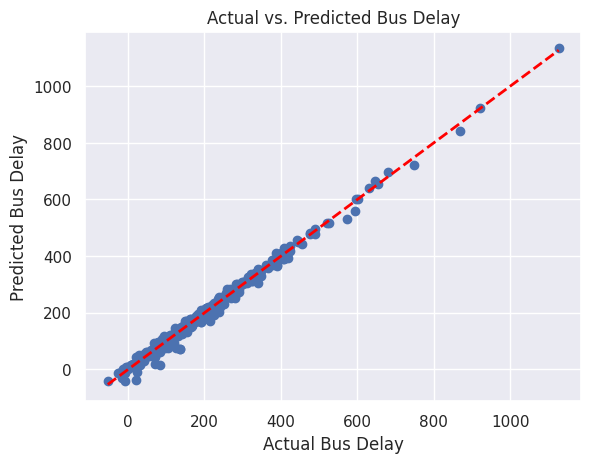

In [ ]:
# Print the MSE
print(f'Mean Squared Error (MSE): {mse_boost}')
print(f"R-squared: {R2}")

# Visualize predicted vs. actual bus delay
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Bus Delay")
plt.ylabel("Predicted Bus Delay")
plt.title("Actual vs. Predicted Bus Delay")
# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()